# Introduction to the exploration of epidemiological models using EMULSION



| Author: **Sébastien Picault, INRAE** | June 2-4, 2021 |
|---|---|
| License: [CC-BY-NC-SA](https://en.wikipedia.org/wiki/Creative_Commons_license) | ![CC-BY-NC-SA](https://upload.wikimedia.org/wikipedia/commons/1/12/Cc-by-nc-sa_icon.svg "License CC-BY-NC-SA") |






## Exercise 1 — Your first EMULSION model

File [`exercises/step1.yaml`](exercises/step1.yaml) describes EMULSION components of a discrete-time, stochastic, compartment-based SIR model.

1. Open the file in a text editor and look at the different parts. Identify where states and transitions, initial conditions, and parameters are defined.
2. Run the model and look at simulation outcomes. To do so, open a terminal in the `exercises` directory and type what follows:
    
```
emulsion run --plot step1.yaml
```


In [15]:
alias emulsion python -m emulsion

In [33]:
%%bash 
cd exercises
emulsion run --plot step1.yaml

/Users/picault/git/my-first-binder/exercises
Simulation level:herd
Simulation finished in 2.21 s
Outputs stored in outputs/counts.csv
Outputs plot in file: img/stoch_compart_SIR.html


[Run 0]: 100%|██████████| 100/100
[Run 1]: 100%|██████████| 100/100
[Run 2]: 100%|██████████| 100/100
[Run 3]: 100%|██████████| 100/100
[Run 4]: 100%|██████████| 100/100
[Run 5]: 100%|██████████| 100/100
[Run 6]: 100%|██████████| 100/100
[Run 7]: 100%|██████████| 100/100
[Run 8]: 100%|██████████| 100/100
[Run 9]: 100%|██████████| 100/100


Plots corresponding to simulation outcomes are produced in a file named after the `model_name` value specified in the YAML file: [img/stoch_compart_SIR.yaml](exercises/img/stoch_compart_SIR.yaml). 

They are built from the simulation outputs which are stored in a CSV file named `counts.csv`, which by default is located in the `outputs/` directory: [outputs/counts.csv](exercises/outputs/counts.csv)

**NOTE:** Running `emulsion -h` provides all possible commands and options (see main ones in file [`appendix.pdf`](appendix.pdf)). Also, in the terminal, the command comes with completion (start typing and hit TAB key to view proposals).

In [35]:
emulsion -h

Usage:
    emulsion run [--plot] MODEL [options] [(-p KEY=VALUE)...]
    emulsion show MODEL [options] [(-p KEY=VALUE)...]
    emulsion describe MODEL PARAM...
    emulsion diagrams MODEL [options]
    emulsion plot MODEL [options]
    emulsion check MODEL [options]
    emulsion generate MODEL
    emulsion (-h | --help | -V | --version | -L | --license)

Commands:
  run MODEL                   Run simulations based on the specified MODEL
                              (MODEL is the path to the YAML file describing the
                              model to run).
  show MODEL                  Print all MODEL parameter values and exit.
  describe MODEL PARAM...     Describe the role of specified PARAMeters in the
                              MODEL and exit.
  diagrams MODEL              Produce model diagrams (as option --view-model
                              when running/plotting) and open them
  plot MODEL                  Plot outputs for MODEL (assumed already run) and
           

3. Add a representation of the state machine on your plots:

    ```
    emulsion run --plot step1.yaml --view-model
    ```

then look at the results here: [img/stoch_compart_SIR.html](exercises/img/stoch_compart_SIR.html). 
    

In [1]:
%%bash
cd exercises
emulsion run --plot step1.yaml --view-model

Simulation level:herd
Generated state machine diagram img/stoch_compart_SIR_health_state_machine.svg
Simulation finished in 2.56 s
Outputs stored in outputs/counts.csv
Outputs plot in file: img/stoch_compart_SIR.html


[Run 0]: 100%|██████████| 100/100
[Run 1]: 100%|██████████| 100/100
[Run 2]: 100%|██████████| 100/100
[Run 3]: 100%|██████████| 100/100
[Run 4]: 100%|██████████| 100/100
[Run 5]: 100%|██████████| 100/100
[Run 6]: 100%|██████████| 100/100
[Run 7]: 100%|██████████| 100/100
[Run 8]: 100%|██████████| 100/100
[Run 9]: 100%|██████████| 100/100


 * These diagrams are produced automatically from the model using Graphviz and the "dot" format. The corresponding figures are in the `img/` directory, for instance [stoch_compart_SIR_health_state_machine.svg](exercises/img/stoch_compart_SIR_health_state_machine.svg). 
    
 * The "dot" files are in `outputs/` and can be customized for further use: [stoch_compart_SIR_health_state.dot](exercises/outputs/stoch_compart_SIR_health_state.dot)
    

4. Play with the model through the command-line interface: for instance, to run only one repetition (`-r 1`) but observe the evolution of the system in the long run (500 days: `-t 500`) with different parameter values (`-p` to change parameter value):

```
emulsion run --plot step1.yaml -r 1 -t 500 -p transmission_I=0.2 -p initial_prevalence=0.1
 ```
 

In [41]:
%%bash
cd exercises
emulsion run --plot step1.yaml -r 1 -t 500 -p transmission_I=0.2 -p initial_prevalence=0.1

/Users/picault/git/my-first-binder/exercises
Simulation level:herd
Simulation finished in 0.95 s
Outputs stored in outputs/counts.csv
Outputs plot in file: img/stoch_compart_SIR.html


[Run 0]: 100%|██████████| 500/500


## Exercise 2 — Introduce demography and age structure

Open file [`step2.yaml`](exercises/step2.yaml) and incorporate the following changes:

1. We will represent two age groups: **juveniles** (J) and **adults** (A), juveniles becoming adults at rate *maturation=0.05*. We will take example on existing parameters, processes and state machines:

  * add a process at animals level, named `age_group`
  
        processes:
          animals:
            - health_state
            - age_group   
      
  * add a state machine `age_group`, with two states (J and A), and a transition between J and A 

          state_machine:
             ...
             age_group:
             desc: '...'
             states:
               - J:
                   name: 'Juveniles'
                   desc: '...'
                   fillcolor: 'purple'
               - A:
                   name: 'Adults'
                   desc: 'a...'
                   fillcolor: 'darkred'
             transitions:
               - {from: J, to: A, rate: 'maturation'}

  * add the parameter `maturation`
  
          parameters:
            ...
            maturation: 
              desc: 'maturation rate, i.e. speed at which juveniles become adults'
              value: 0.05      
  

3. Run the model and observe the results. 
    
    ```
    emulsion run --plot step2.yaml --silent
    ```

**NOTE:** Initial individuals are distributed randomly in J and A states. To automatically affect the whole population to state J, add to the description of state J (with name, desc, etc.):

               - J:
                   name: 'Juveniles'
                   desc: '...'
                   fillcolor: 'purple'
                   default: yes

In [7]:
 %%bash
cd exercises 
python -m emulsion run --plot step2.yaml --silent -r 100

Simulation level:herd
Simulation finished in 32.82 s
Outputs stored in outputs/counts.csv
Outputs plot in file: img/stoch_compart_SIR.html


100%|██████████| 100/100


## Integrating with R

The default plots produced by EMULSION are not meant to be used but for immediate feedback during model prototyping. Otherwise, the simulation results can be processed with your favourite statistics tool. In what follows, we will provide examples based on [R](https://www.r-project.org/) with libraires [tidyverse](https://www.tidyverse.org/).

In [3]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


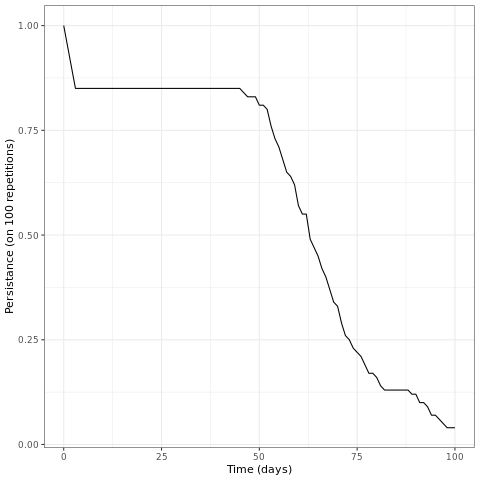

In [10]:
%%R
library(tidyverse)
results <- read.table("~/exercises/outputs/counts.csv", sep=",", header=TRUE)
## names(results)
## [1] "simu_id"               "S"                     "I"                    
## [4] "R"                     "J"                     "A"                    
## [7] "step"                  "level"                 "agent_id"             
##[10] "percentage_prevalence" "total_herd"           

## compute a persistence curve
NB.RUNS = max(results$simu_id) + 1 
results %>% select(simu_id, step, I) %>% mutate(persists=(I > 0)) %>% group_by(step) %>% summarise(persistance=sum(persists)/NB.RUNS) %>%
  ggplot() + geom_line(aes(x=step, y=persistance)) + theme_bw() + xlab("Time (days)") + ylab(paste("Persistance (on", NB.RUNS, "repetitions)"))